In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Libraries 

In [2]:
import tensorflow 
import numpy as np 
from tensorflow import keras 
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import layers
import pandas as pd 
import matplotlib.pyplot as plt 
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Importing the data set

In [3]:
train_dir = '/content/drive/MyDrive/tensorflow/Mask Detetction/Final_Assignment_Face Mask Dataset/Train'
test_dir = '/content/drive/MyDrive/tensorflow/Mask Detetction/Final_Assignment_Face Mask Dataset/Test'
valid_dir = '/content/drive/MyDrive/tensorflow/Mask Detetction/Final_Assignment_Face Mask Dataset/Validation'


## Data Prepossessing 

In [4]:
train_datagen = ImageDataGenerator(
    rescale = (1./255),
    rotation_range = 50,
    horizontal_flip = True,
    height_shift_range = 0.4,
    width_shift_range = 0.4,
    shear_range = 0.4,
)

valid_datagen = ImageDataGenerator(rescale=(1./255))


In [20]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (128,128),
    class_mode = 'binary',
    batch_size = 32
)

valid_generator = valid_datagen.flow_from_directory(
    test_dir,
    target_size = (128,128),
    class_mode = 'binary',
    batch_size = 32
)

Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


## Building The Model

### Using the VGG16 model
using the VGG16 model's first part 

In [8]:
convo_base = VGG16(weights='imagenet',
                   input_shape = (128,128,3),
                   include_top=False
                   )

58900480/58889256 [==============================] - 0s 0us/step


In [9]:
convo_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

### Merging the the model

we are merging the convo to our output model part 

In [10]:
model = models.Sequential()
model.add(convo_base)
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['acc'])

In [12]:
check_point = keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/tensorflow/Mask Detetction/models/Mask_Detection_Model-{epoch:02d}.h5")

In [18]:
trained_model = model.fit(train_generator,
                          validation_data=valid_generator,
                          steps_per_epoch=100,
                          epochs=20,
                          #validation_steps=50,
                          callbacks=[check_point])

Epoch 1/20
100/100 [==============================] - 24s 235ms/step - loss: 0.3433 - acc: 0.8756 - val_loss: 0.1890 - val_acc: 0.9463
Epoch 2/20
100/100 [==============================] - 24s 242ms/step - loss: 0.2999 - acc: 0.8956 - val_loss: 0.3366 - val_acc: 0.8888
Epoch 3/20
100/100 [==============================] - 24s 241ms/step - loss: 0.3608 - acc: 0.8841 - val_loss: 0.2564 - val_acc: 0.9150
Epoch 4/20
100/100 [==============================] - 24s 243ms/step - loss: 0.2989 - acc: 0.8950 - val_loss: 0.1680 - val_acc: 0.9475
Epoch 5/20
100/100 [==============================] - 24s 243ms/step - loss: 0.3085 - acc: 0.8903 - val_loss: 0.3155 - val_acc: 0.8525
Epoch 6/20
100/100 [==============================] - 24s 236ms/step - loss: 0.3371 - acc: 0.8878 - val_loss: 0.1398 - val_acc: 0.9538
Epoch 7/20
100/100 [==============================] - 24s 239ms/step - loss: 0.3040 - acc: 0.8876 - val_loss: 0.3747 - val_acc: 0.8525
Epoch 8/20
100/100 [==============================] - 2

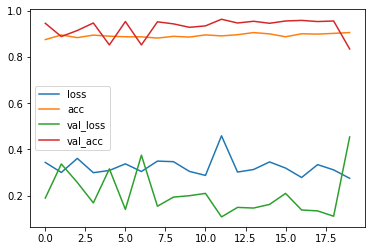

In [19]:
pd.DataFrame(trained_model.history).plot()